In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

Markov-Chain Monte-Carlo for the one-dimensional potential $U(x^2) = \frac {x^2} 2 $

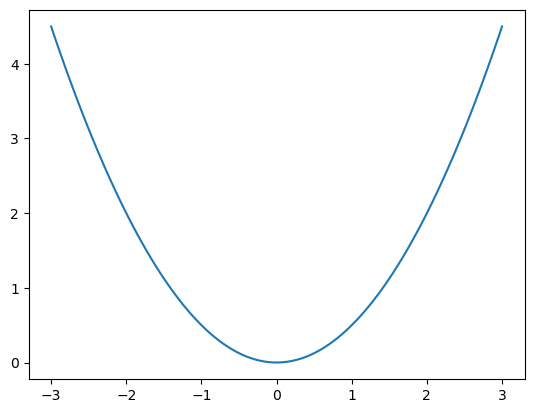

In [2]:
def harmonic_well(x):
    return x**2 / 2

x = np.linspace(-3, 3, 100)
plt.plot(x, harmonic_well(x))

In [3]:
def MCMC(potential, beta, n_steps, delta, ini_pos):
    """Performs the Metropolis-Hastings algorithm for the Boltzmann distribution on the 1-dimensional line
    with the given potential and beta"""
    pos = ini_pos
    pos_list = [pos]
    for k in tqdm(range(n_steps)):
        new_pos = pos + np.random.uniform(-delta, delta)
        if np.random.random() < np.exp(- beta * (potential(new_pos) - potential(pos))):
            pos = new_pos
        pos_list.append(pos)
    return pos_list

  0%|          | 0/1000000 [00:00<?, ?it/s]

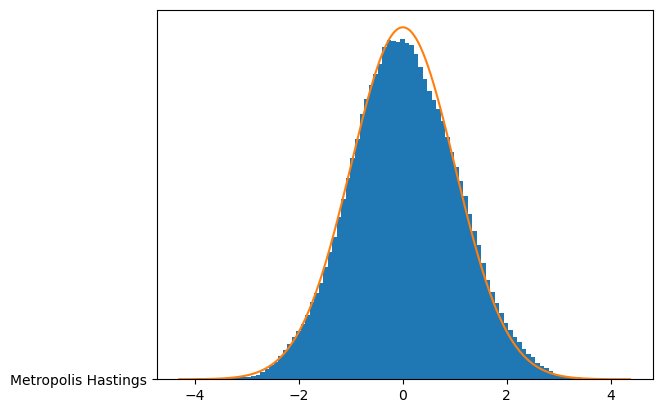

In [11]:
beta = 1
n_steps = 1000000
delta = 0.1
ini_pos = 0

histogram = MCMC(harmonic_well, beta, n_steps, delta, ini_pos)

x = np.linspace(min(histogram), max(histogram), 1000)

plt.hist(histogram, density=True, bins = 100)
plt.plot(x, (2 * np.pi / beta)**-0.5 * np.exp(- beta * harmonic_well(x)))

plt.plot("Metropolis Hastings")

Lifted MCMC where we have a fixed direction that changes whenever we reject.

In [5]:
def lifted_MCMC(potential, beta, n_steps, delta, ini_pos):
    """Performs the lifted Metropolis-Hastings algorithm for the Boltzmann distribution on the 1-dimensional line
    with the given potential and beta"""
    pos = ini_pos
    direction = 1
    pos_list = [pos]
    for k in tqdm(range(n_steps)):
        new_pos = pos + direction * np.random.uniform(0, delta)
        if np.random.random() < np.exp(- beta * (potential(new_pos) - potential(pos))):
            pos = new_pos
        else:
            direction *= -1
        pos_list.append(pos)
    return pos_list

  0%|          | 0/1000000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Lifted MCMC')

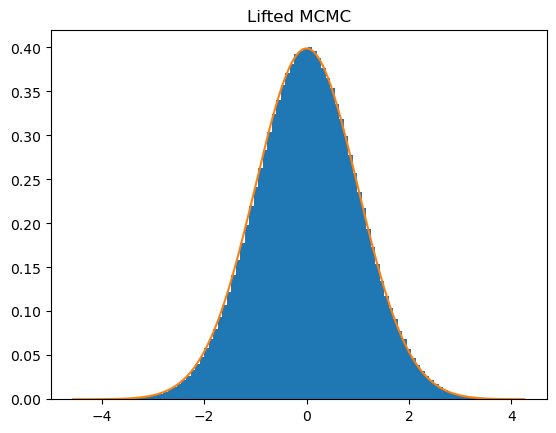

In [6]:
beta = 1
n_steps = 1000000
delta = 0.1
ini_pos = 0

histogram = lifted_MCMC(harmonic_well, beta, n_steps, delta, ini_pos)

x = np.linspace(min(histogram), max(histogram), 1000)

plt.hist(histogram, density=True, bins = 100)
plt.plot(x, (2 * np.pi / beta)**-0.5 * np.exp(- beta * harmonic_well(x)))

plt.title("Lifted MCMC")

In [28]:
def zig_zag(beta, n_steps, speed):
    """Performs the waiting times algorithm"""
    direction = 1
    last_rejection_pos = 0
    last_rejection_time = 0
    pos_list = []
    for k in tqdm(range(n_steps)):
        new_U = np.random.exponential()
        new_rejection_pos = direction * (2 * new_U / beta)**0.5
        new_rejection_time = last_rejection_time + (new_rejection_pos - last_rejection_pos) / speed
        pos_list += [(new_rejection_pos - last_rejection_pos) * (time - last_rejection_time) / (new_rejection_time - last_rejection_time) + last_rejection_pos for time in range(int(last_rejection_time), int(new_rejection_time)+1)]
        last_rejection_pos = new_rejection_pos
        last_rejection_time = new_rejection_time
        direction *= -1
    return pos_list

  0%|          | 0/10000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Waiting times')

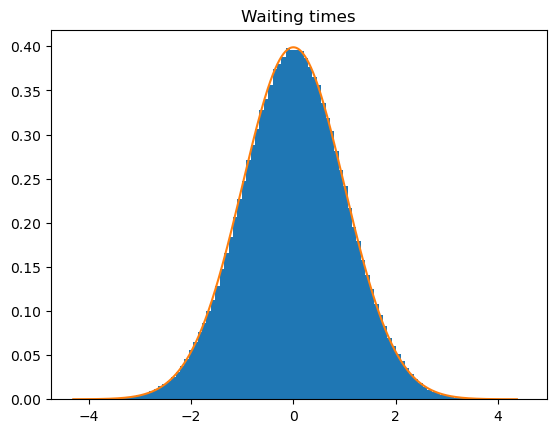

In [36]:
beta = 1
n_steps = 10000
speed = 0.001

histogram = zig_zag(beta, n_steps, speed)

plt.hist(histogram, bins = 100, density=True)
plt.plot(x, (2 * np.pi / beta)**-0.5 * np.exp(- beta * harmonic_well(x)))
plt.title("Waiting times")